In this Jupyter Notebook, we define eco-sensitivity rank of the global river basins based on four hydropower-fish parameters: untapped hydropower potential, planned hydropower capacity, fish richness, and fish catch. 

We also plot the parameters on a scatter plot and identify the world's top 20 eco-sensitive river basins.

Author: AFM Kamal Chowdhury

Email: kchy@umd.edu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# path to data directory
datapath = '../data/'

# path to figures directory
figpath = '../figures/'

# set 'yes' to save the output figure
save_outputs = 'no' # 'yes' 'no'

### Import data

In [4]:
# import data for untapped hydro potential, planned hydro capacity, fish richness, and fish catch by basins
df_hydro_fish_stats_by_basins = pd.read_csv(datapath+'other_data/hydro_fish_stats_by_basins.csv', skiprows=11, header=0)

df_hydro_fish_stats_by_basins.columns

Index(['basin_nm', 'rem_exploitable_hydro_by_bas_pwh',
       'projected_hydro_cap_by_bas_mw', 'fish_species_richness_by_bas_count',
       'fish_catch_by_bas_tonne_p_yr'],
      dtype='object')

### Estimate eco-sensitivity ranks of the basins

In [5]:
# calculate normalize the score of each parameter for each basin

df_hydro_fish_stats_by_basins['rem_exploitable_hydro_by_bas_norm'] = ((df_hydro_fish_stats_by_basins['rem_exploitable_hydro_by_bas_pwh'] - 
                                                                       min(df_hydro_fish_stats_by_basins['rem_exploitable_hydro_by_bas_pwh']))/
                                                                      (max(df_hydro_fish_stats_by_basins['rem_exploitable_hydro_by_bas_pwh']) -
                                                                       min(df_hydro_fish_stats_by_basins['rem_exploitable_hydro_by_bas_pwh'])))


df_hydro_fish_stats_by_basins['projected_hydro_cap_by_bas_norm'] = ((df_hydro_fish_stats_by_basins['projected_hydro_cap_by_bas_mw'] - 
                                                                       min(df_hydro_fish_stats_by_basins['projected_hydro_cap_by_bas_mw']))/
                                                                      (max(df_hydro_fish_stats_by_basins['projected_hydro_cap_by_bas_mw']) -
                                                                       min(df_hydro_fish_stats_by_basins['projected_hydro_cap_by_bas_mw'])))


df_hydro_fish_stats_by_basins['fish_catch_by_bas_norm'] = ((df_hydro_fish_stats_by_basins['fish_catch_by_bas_tonne_p_yr'] - 
                                                                       min(df_hydro_fish_stats_by_basins['fish_catch_by_bas_tonne_p_yr']))/
                                                                      (max(df_hydro_fish_stats_by_basins['fish_catch_by_bas_tonne_p_yr']) -
                                                                       min(df_hydro_fish_stats_by_basins['fish_catch_by_bas_tonne_p_yr'])))

df_hydro_fish_stats_by_basins['fish_species_richness_by_bas_norm'] = ((df_hydro_fish_stats_by_basins['fish_species_richness_by_bas_count'] - 
                                                                       min(df_hydro_fish_stats_by_basins['fish_species_richness_by_bas_count']))/
                                                                      (max(df_hydro_fish_stats_by_basins['fish_species_richness_by_bas_count']) -
                                                                       min(df_hydro_fish_stats_by_basins['fish_species_richness_by_bas_count'])))


In [6]:
# calculate eco-sensitivity scores as multiplication of the normalized scores
cols_normed = ['rem_exploitable_hydro_by_bas_norm', 'projected_hydro_cap_by_bas_norm', 'fish_catch_by_bas_norm',
               'fish_species_richness_by_bas_norm']

df_hydro_fish_stats_by_basins['hydro_eco_score'] = df_hydro_fish_stats_by_basins.loc[:,cols_normed].prod(axis=1)


# sort data by decending order of eco-sensitivity scores
df_hydro_fish_stats_by_basins = df_hydro_fish_stats_by_basins.sort_values(by=['hydro_eco_score'], ascending=False)


# assign eco-sensitivity ranks as basin with the highest eco-sensitivity score is ranked '1'
df_hydro_fish_stats_by_basins['basin_eco_sensitivity_rank'] = np.arange(len(df_hydro_fish_stats_by_basins))+1


### Plot and save outputs

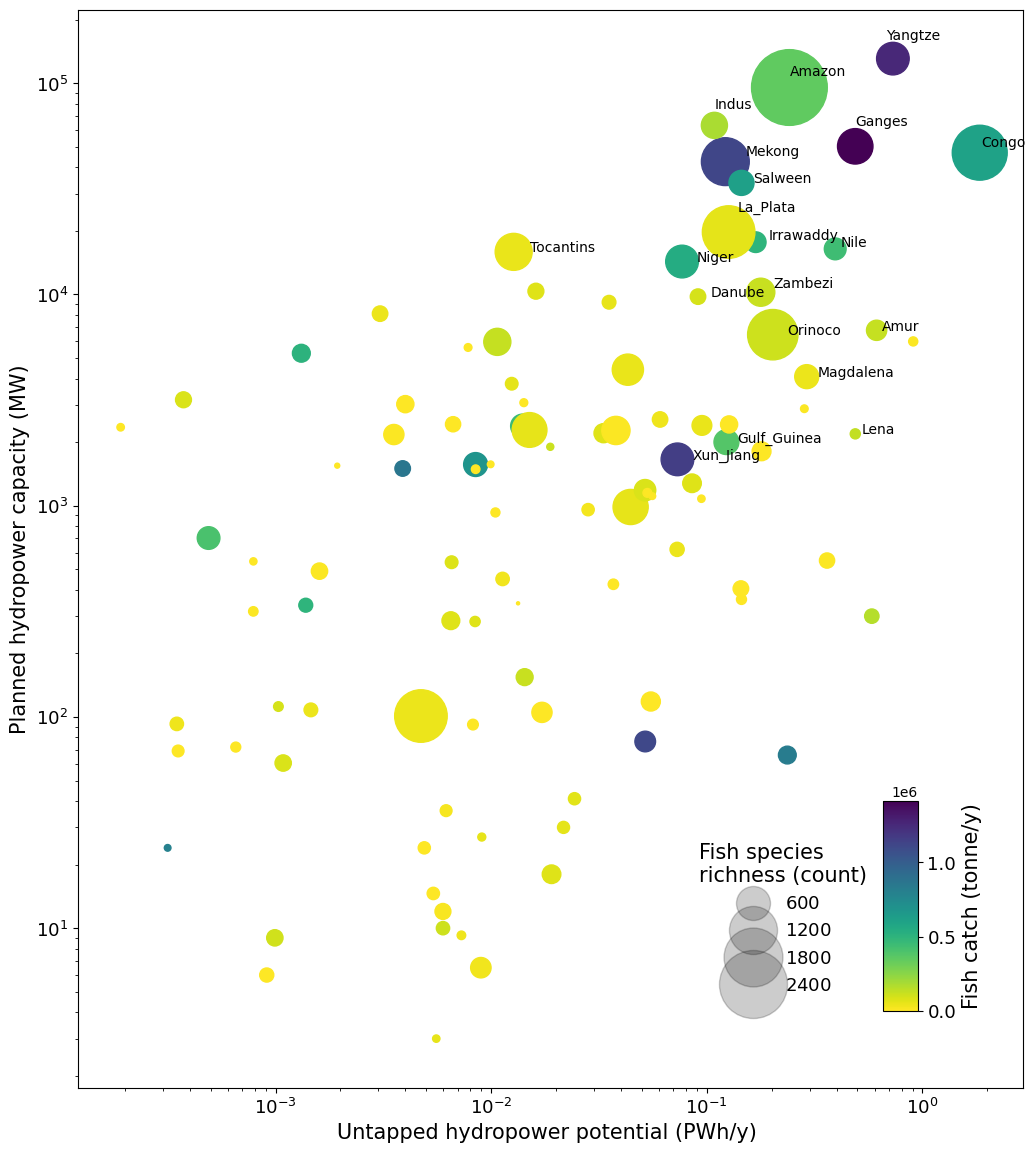

In [7]:
# plot untapped potential in x-axis, planned capacity in y-axis, fish catch in color, and fish species in size
x1 = df_hydro_fish_stats_by_basins['rem_exploitable_hydro_by_bas_pwh']
y1 = df_hydro_fish_stats_by_basins['projected_hydro_cap_by_bas_mw']
c1 = df_hydro_fish_stats_by_basins['fish_catch_by_bas_tonne_p_yr']
s1 = df_hydro_fish_stats_by_basins['fish_species_richness_by_bas_count']


fig, (ax1) = plt.subplots(1, 1, figsize=(14,14))

# scatter plot showing four hydropower-fish parameters
sc1 = ax1.scatter(x1, y1, c=c1, s=s1, cmap='viridis_r')



# define basin names as label to annotate over the scatter plot
df_hydro_fish_stats_by_basins['label'] = df_hydro_fish_stats_by_basins['basin_nm']

# shorten names of Ganges_Bramaputra and Gulf_of_Guinea for visualization purpose
df_hydro_fish_stats_by_basins.loc[df_hydro_fish_stats_by_basins["label"] == "Ganges_Bramaputra", 
                                       "label"] = 'Ganges'
df_hydro_fish_stats_by_basins.loc[df_hydro_fish_stats_by_basins["label"] == "Gulf_of_Guinea", 
                                       "label"] = 'Gulf_Guinea'


# annotate names of top 20 eco-sensitive basins
for idx, row in df_hydro_fish_stats_by_basins.iterrows():
    if row['basin_eco_sensitivity_rank']<=20 and row['projected_hydro_cap_by_bas_mw']>10**5:
        ax1.annotate(row['label'], (( row['rem_exploitable_hydro_by_bas_pwh']-0.05, 
                                                           row['projected_hydro_cap_by_bas_mw']+30000)))
        
    elif row['basin_eco_sensitivity_rank']<=20 and row['projected_hydro_cap_by_bas_mw']>5*10**4:
        ax1.annotate(row['label'], (( row['rem_exploitable_hydro_by_bas_pwh'], 
                                                           row['projected_hydro_cap_by_bas_mw']+13000)))
        
    elif row['basin_eco_sensitivity_rank']<=20 and row['projected_hydro_cap_by_bas_mw']>4*10**4:
        ax1.annotate(row['label'], (( row['rem_exploitable_hydro_by_bas_pwh']+0.03, 
                                                           row['projected_hydro_cap_by_bas_mw']+3000)))
        
    elif row['basin_eco_sensitivity_rank']<=20 and row['projected_hydro_cap_by_bas_mw']>2*10**4:
        ax1.annotate(row['label'], (( row['rem_exploitable_hydro_by_bas_pwh']+0.02, 
                                                           row['projected_hydro_cap_by_bas_mw']+0)))
        
    elif row['basin_eco_sensitivity_rank']<=20 and row['projected_hydro_cap_by_bas_mw']>1*10**4 and row['rem_exploitable_hydro_by_bas_pwh']>0.15:
        ax1.annotate(row['label'], (( row['rem_exploitable_hydro_by_bas_pwh']+0.025, 
                                                           row['projected_hydro_cap_by_bas_mw']+500)))

    elif row['basin_eco_sensitivity_rank']<=20 and row['projected_hydro_cap_by_bas_mw']>1*10**4 and row['rem_exploitable_hydro_by_bas_pwh']>0.1:
        ax1.annotate(row['label'], (( row['rem_exploitable_hydro_by_bas_pwh']+0.012, 
                                                           row['projected_hydro_cap_by_bas_mw']+5000)))

    elif row['basin_eco_sensitivity_rank']<=20 and row['projected_hydro_cap_by_bas_mw']>1*10**3 and row['rem_exploitable_hydro_by_bas_pwh']>0.15:
        ax1.annotate(row['label'], (( row['rem_exploitable_hydro_by_bas_pwh']+0.035, 
                                                           row['projected_hydro_cap_by_bas_mw']+0)))
        
    elif row['basin_eco_sensitivity_rank']<=20 and row['rem_exploitable_hydro_by_bas_pwh']>0.1:
        ax1.annotate(row['label'], (( row['rem_exploitable_hydro_by_bas_pwh']+0.015, 
                                                           row['projected_hydro_cap_by_bas_mw']+0)))
        
    elif row['basin_eco_sensitivity_rank']<=20 and row['rem_exploitable_hydro_by_bas_pwh']>0.05:
        ax1.annotate(row['label'], (( row['rem_exploitable_hydro_by_bas_pwh']+0.013, 
                                                           row['projected_hydro_cap_by_bas_mw']+0)))
        
    elif row['basin_eco_sensitivity_rank']<=20:
        ax1.annotate(row['label'], (( row['rem_exploitable_hydro_by_bas_pwh']+0.0025, 
                                                           row['projected_hydro_cap_by_bas_mw']+0)))


# set x and y axis in log-scale
ax1.set_yscale('log')
ax1.set_xscale('log')


# legend for size
handles, labels = sc1.legend_elements(prop="sizes", num=5,func=lambda s:(s/1.0+min(s1)), c='k', alpha=0.20)
legend1 = ax1.legend(handles, labels, loc= (0.65,0.08), ncol=1, fontsize=13, frameon=False)
legend1.set_title("Fish species \nrichness (count)",prop={'size':15})


# legend for color
fig.subplots_adjust(right=0.8,hspace=0.3,wspace=0.3)
cbar_ax = fig.add_axes([0.70, 0.165, 0.025, 0.15])
fig.colorbar(sc1, cax=cbar_ax)
cbar_ax.set_ylabel('Fish catch (tonne/y)',fontsize=15)
cbar_ax.tick_params(axis='y', labelsize=13)


# labels for x and y axes
ax1.set_xlabel('Untapped hydropower potential (PWh/y) ',fontsize=15)
ax1.set_ylabel('Planned hydropower capacity (MW)',fontsize=15)


ax1.tick_params(axis='y', labelsize=13)
ax1.tick_params(axis='x', labelsize=13)


# save output
if save_outputs == 'yes':
    plt.savefig(figpath+"fig1_selection_of_eco_sensitive_basins.pdf", bbox_inches='tight')

    
plt.show()

save eco-sensitivity rank outputs in csv

In [8]:
# columns in the df
df_hydro_fish_stats_by_basins.columns

Index(['basin_nm', 'rem_exploitable_hydro_by_bas_pwh',
       'projected_hydro_cap_by_bas_mw', 'fish_species_richness_by_bas_count',
       'fish_catch_by_bas_tonne_p_yr', 'rem_exploitable_hydro_by_bas_norm',
       'projected_hydro_cap_by_bas_norm', 'fish_catch_by_bas_norm',
       'fish_species_richness_by_bas_norm', 'hydro_eco_score',
       'basin_eco_sensitivity_rank', 'label'],
      dtype='object')

In [9]:
# select which data columns to save in csv
cols_to_save = ['basin_nm', 'basin_eco_sensitivity_rank', 'label']

# save desired output data
if save_outputs == 'yes':
    df_hydro_fish_stats_by_basins[cols_to_save].to_csv(datapath+'other_data/eco_sensitivity_rank_by_basins.csv', 
                                                                   index=False)